https://www.kaggle.com/datasets/ashydv/advertising-dataset

### 데이터 불러오기 및 살펴보기

In [1]:
# scikit-learn 설치 및 버전 확인
# pip install scikit-learn

import sklearn
sklearn.__version__

'1.8.0'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# deprecated 경고 무시 
import warnings 
warnings.filterwarnings("ignore")

#플롯 배경에 회색 격자 무늬
plt.style.use('ggplot') 

In [3]:
import pandas as pd

# TODO: advertising.csv 파일을 읽어와서 5개의 레코드를 출력
advertising = pd.read_csv('./data/advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
# TODO: 데이터프레임 정보 확인하기
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


-> 결측치 없음. 모두 float형태

In [6]:
# TODO: 통계정보 확인하기
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


-> 0값이 존재. 어떻게 처리할 건지? : 아마 아예 광고를 넣지 않았다는 의미일듯     
-> TV나 신문의 경우 최솟값~최댓값 범위가 넒음. 어떻게 처리할 건지?

In [10]:
# TODO: 통계 정보 행과 열 바꾸기
# advertising.describe().transpose()
advertising.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


### 의미 있는 변수 고르기 (단순 선형 회귀)

->  보기 쉽게 행/열 전환

변수 간 상관관계(correlation) 계산하기

In [9]:
# TODO: 컬럼간의 상관계수 확인하기
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


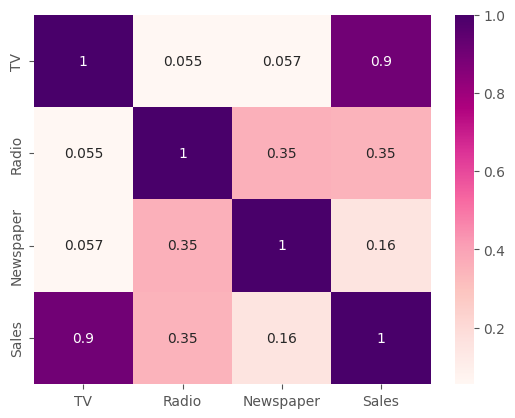

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = advertising.corr()
sns.heatmap(corrMatrix, annot=True, cmap='RdPu')
plt.show()

In [12]:
# 히트맵을 기준으로 상관 관계가 높은 속성을 내림 차순으로 정렬하여 시각화

corr_sort = corrMatrix[['Sales']].sort_values(by='Sales', ascending= False)
corr_sort

,Sales
Sales,1.000000
TV,0.901208
Radio,0.349631
Newspaper,0.157960


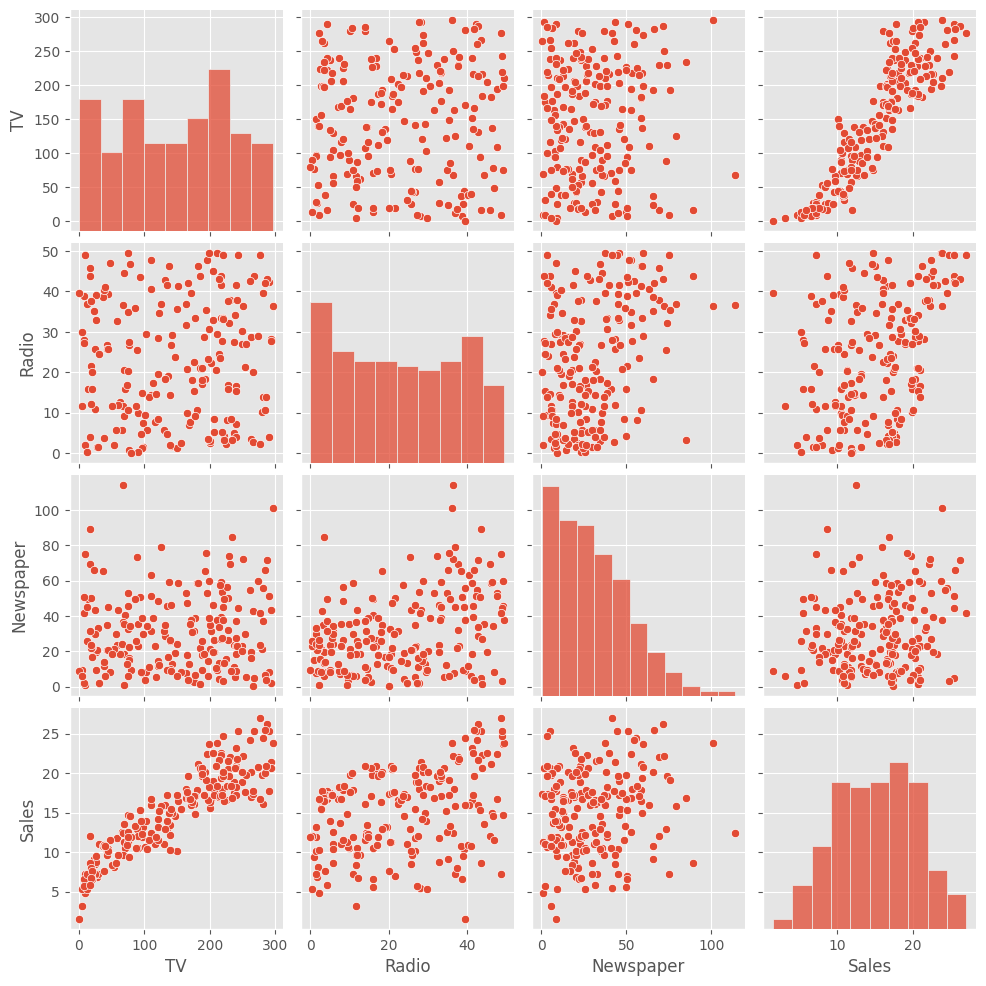

In [13]:
sns.pairplot(advertising)
plt.show()

-> TV와 Sales의 경우 scatter plot에서 명확한 경향성, 추세가 보이고 나머지는 딱히 명확한게 보이지는 않는다

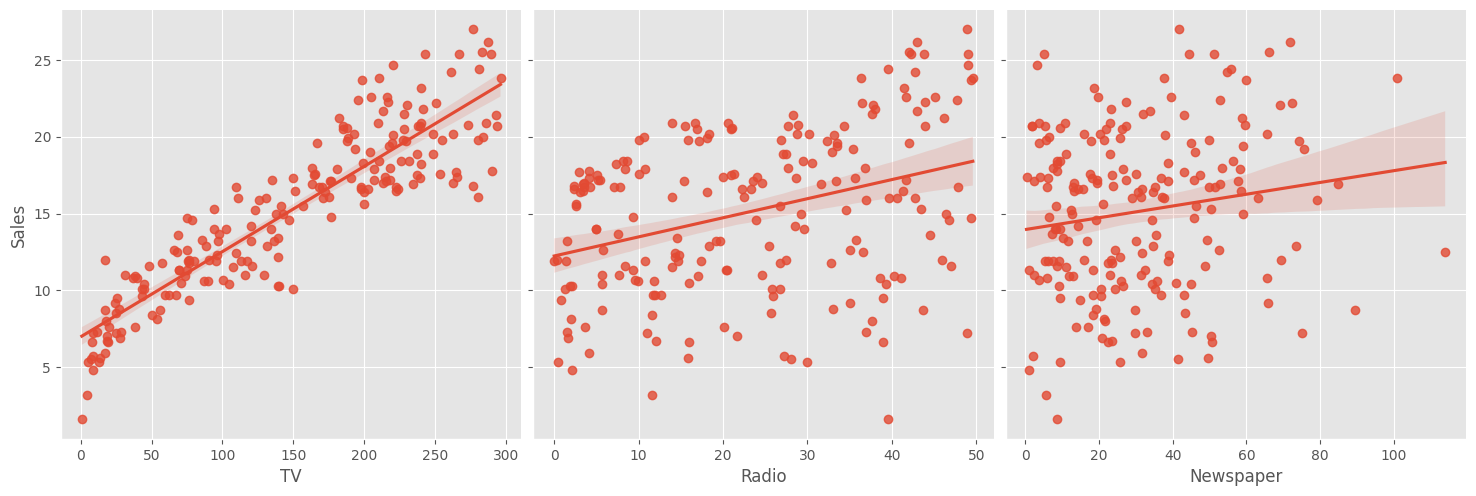

In [41]:
# 'TV', 'Radio', 'Newspaper'의 판매량 pairplot의 세개의 그래프만 그리면서 산점도와 함께 선형회귀선 포함하여 시각화하기

sns.pairplot(data=advertising, height=5, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', kind='reg') 
plt.show()

=> TV 컬럼을 이용해 단순 선형 회귀에 사용

### 단순 선형 회귀

In [16]:
#독립변수로 TV 컬럼만 가져온다.
X_data1 = advertising[['TV']] # x변수는 학습할 때 df로 받기 때문에 df로 가져오기

#종속변수로 Sales 데이터를 가져온다
y_data1 = advertising['Sales'] #시리즈로 가져오기

In [17]:
X_data1.head(1)

,TV
0,230.1


In [18]:
y_data1.head(1)

0    22.1
Name: Sales, dtype: float64

현재는 TV 하나만 다루므로 스케일링 하지 않고 일단 진행

In [21]:
# 훈련 데이터와 테스트 데이터를 7:3 비율로 나누기, random_state = 42
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_data1, y_data1, test_size=0.3, random_state=42)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(140, 1) (60, 1) (140,) (60,)


In [ ]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 생성
lr_model1 = LinearRegression()
lr_model1

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [22]:
# 선형 회귀 모델 학습 TODO:YOUR_CODE_HERE
lr_model1.fit(X_train1, y_train1)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


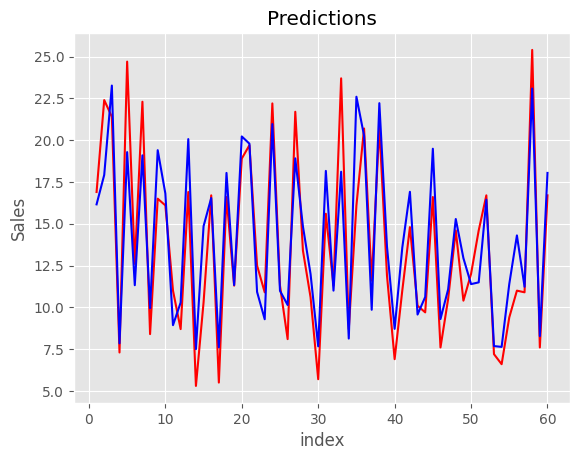

In [ ]:
y_pred1 = lr_model1.predict(X_test1)    #preict는 2D 배열을 인풋으로 받음!

c = [i for i in range(1, 61, 1)]
plt.plot(c, y_test1, color = 'r') # 실젯값
plt.plot(c, y_pred1, color = 'b') # 예측값
plt.xlabel('index') # X축 이름
plt.ylabel('Sales') # Y축 이름
plt.title('Predictions') # 그래프 제목
plt.show()

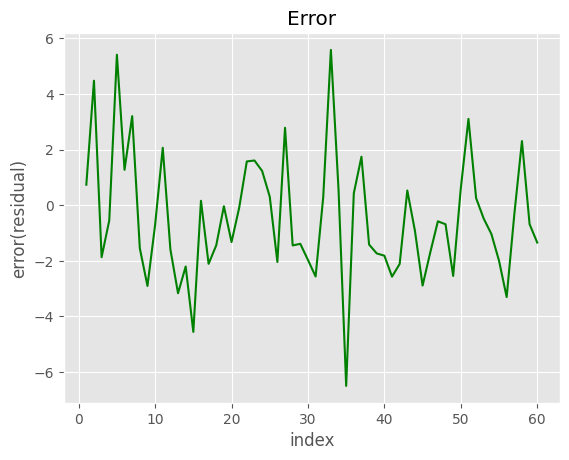

In [24]:
error = y_test1 - y_pred1

plt.plot(c, error, color = 'g')
plt.xlabel('index')
plt.ylabel('error(residual)')
plt.title('Error')
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f'MSE: {mean_squared_error(y_test1, y_pred1):.2f}') # 평균 제곱 오차(MSE)
print(f'r2_score: {r2_score(y_test1, y_pred1):.2f}') # 결정계수(R2)

MSE: 5.18
r2_score: 0.81


In [26]:
# Slope Coefficients(기울기 계수)
w1 = lr_model1.coef_ # 기울기
print(f'slopes of TV: {w1[0]:.2f}')

# Intercept(절편)
b1 = lr_model1.intercept_ # y 절편
print('Intercept is:', b1.round(2))

slopes of TV: 0.05
Intercept is: 7.21


In [38]:
# 새로운 TV광고비를 입력받아 값 예측하기
tv_ad_price = 100
new_test = pd.DataFrame([[tv_ad_price]], columns=['TV'])
sales_point = lr_model1.predict(new_test)
print(sales_point)

[12.69004293]


### 다중 선형 회귀

데이터의 모든 피쳐(3개) 선택하기

In [48]:
# 타겟과 속성 분리하기
# X_data2 = advertising.drop(columns='Sales')
X_data2 = advertising.drop(['Sales'], axis=1)
y_data2 = advertising['Sales']

In [49]:
X_data2.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


<Axes: >

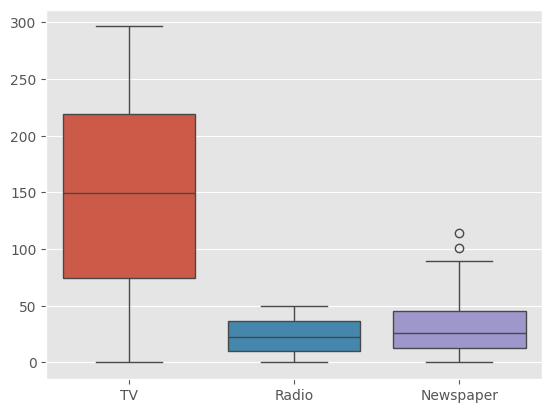

In [50]:
sns.boxplot(X_data2)

140,3 60,3 으로 아까와 다르게 3개의 컬럼(독립변수) 생성됨

#### 스케일링 하기 전, 다중 선형 회귀 결과

In [ ]:
# 훈련 데이터와 테스트 데이터를 7:3으로 나누기
# random_state 옵션을 사용하여 훈련 데이터와 테스트 데이터를 동일한 패턴으로 추출하기

In [52]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_data2, test_size=0.3, random_state=42)

# TODO:YOUR_CODE_HERE
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(140, 3) (60, 3) (140,) (60,)


In [54]:
# 모델 생성 및 학습
from sklearn.linear_model import LinearRegression

lr_model2 = LinearRegression()
lr_model2.fit(X_train2, y_train2)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


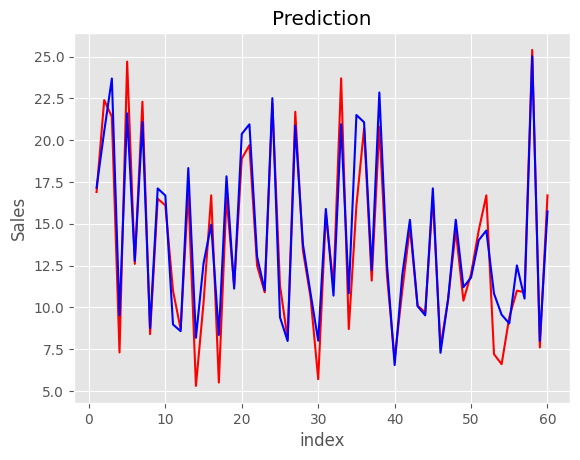

In [ ]:
# 학습한 모델에 테스트 데이터 넣어서 예측해보기 
y_pred2 = lr_model2.predict(X_test2)

# 예측한 값과 원래 값의 차이 보기
c = [i for i in range(1, 61, 1)]

plt.plot(c, y_test2, color = 'r')
plt.plot(c, y_pred2, color ='b')
plt.xlabel('index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

In [58]:
# 예측한 값과 레이블 값 비교해서 지표 확인해보기 
print(f'MSE:{mean_squared_error(y_test2, y_pred2):.2f}')
print(f'r2_score:{r2_score(y_test2, y_pred2):.2f}')

MSE:2.54
r2_score:0.91


스케일링 안 한 단순 선형 회귀 결과)     
* MSE: 5.18
* r2_score: 0.81

스케일링 안 한 다중 선형 회귀 결과)                 
* MSE:2.54
* r2_score:0.91

=> 다중 선형 회귀를 했을 때 더 오차가 줄고 더 잘 설명함(r2점수 상승)을 확인!

#### 스케일링 후, 다중 선형 회귀 결과

In [163]:
# 속성값의 차이가 있으므로 범위를 일정하게 맞춰 주는 표준화 적용하기
# 표준화 : 정규분포로 바꿔주는 것 
from sklearn.preprocessing import StandardScaler

# 스케일러 객체 생성하기
scaler = StandardScaler()

# 훈련 데이터: 스케일러로 학습 -> 표준화 
X_train_scaled = scaler.fit_transform(X_train2)

# 테스트: 학습은 하지 않고 표준화만 해준다!! 
X_test_scaled = scaler.transform(X_test2)

<Axes: >

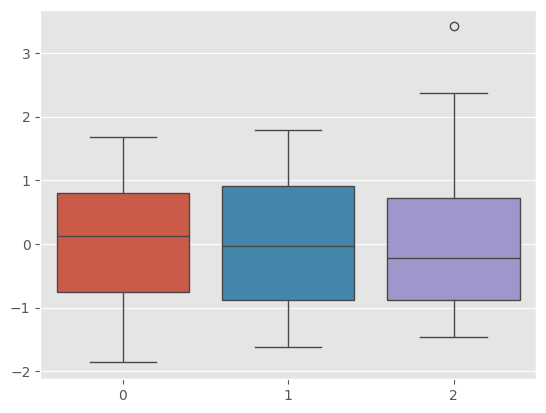

In [164]:
# 스케일링 결과 확인하기
sns.boxplot(X_train_scaled)

In [166]:
# 모델 생성하고 학습시키기
from sklearn.linear_model import LinearRegression

# 스케일링 완료된 학습 데이터로 모델 학습 (y데이터는 스케일 X)
lr_model3 = LinearRegression()
lr_model3.fit(X_train_scaled, y_train2)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [167]:
y_pred2 = lr_model3.predict(X_test_scaled)

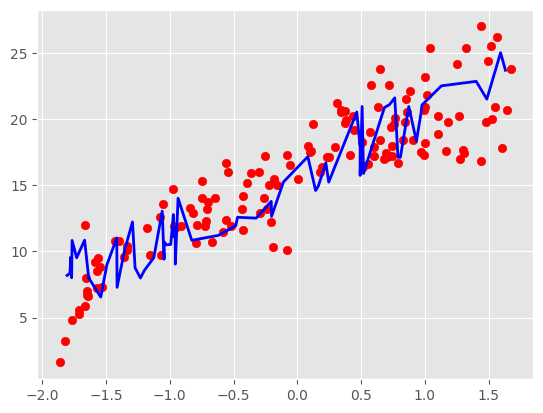

In [168]:
# scatter plot 
sort_idx = np.argsort(X_test_scaled[:, 0])

plt.scatter(X_train_scaled[:, 0], y_train2, color = 'red', label = 'scatter plot, Actual')
plt.plot(X_test_scaled[:, 0][sort_idx], y_pred2[sort_idx], color = 'blue', linewidth = 2, label = 'Regression Line')
plt.show()

In [169]:
print(f'MSE:{mean_squared_error(y_test2, y_pred2):.2f}')
print(f'r2_score:{r2_score(y_test2, y_pred2):.2f}')

MSE:2.54
r2_score:0.91


스케일링 안 한 단순 선형 회귀 결과)     
* MSE: 5.18
* r2_score: 0.81

스케일링 안 한 다중 선형 회귀 결과)                 
* MSE:2.54
* r2_score:0.91

스케일링 한 다중 선형 회귀 결과)
* MSE:2.54
* r2_score:0.91

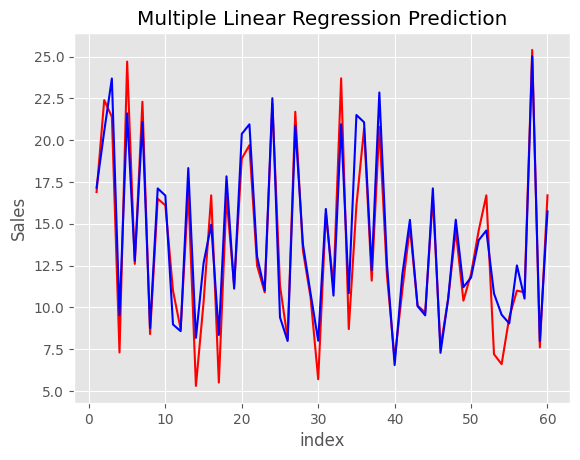

In [135]:
y_pred2 = lr_model3.predict(X_test_scaled)
c = [i for i in range(1, 61, 1)]

plt.plot(c, y_test2, color = 'r')
plt.plot(c, y_pred2, color ='b')
plt.xlabel('index')
plt.ylabel('Sales')
plt.title('Multiple Linear Regression Prediction')
plt.show()

In [ ]:
# 실제값과 예측값을 구해 데이터프레임 형태로 만들기

In [131]:
mlr = pd.DataFrame({'Actual_value': y_test2, 'Model prediction':lr_model3.predict(X_test_scaled)})
mlr.head()

,Actual_value,Model prediction
95,16.9,17.159919
15,22.4,20.533695
30,21.4,23.689144
158,7.3,9.519146
128,24.7,21.607368


In [ ]:
# 실제값과 예측값의 오차를 그래프로 표현

In [ ]:
# 오차 그래프로 시각화하기

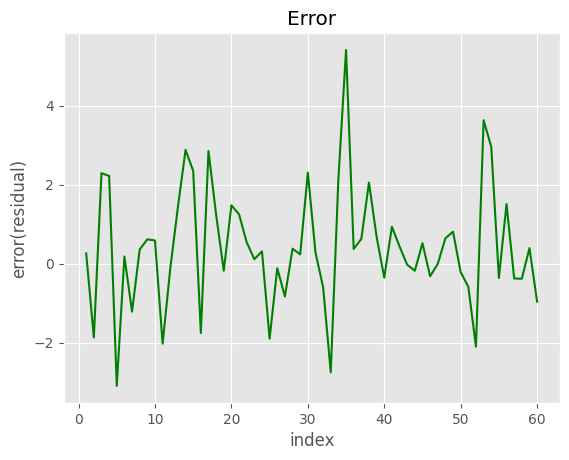

In [98]:
error2 = y_pred2 - y_test2
plt.plot(c, error2, color ='g')
plt.xlabel('index')
plt.ylabel('error(residual)')
plt.title('Error')
plt.show()

In [100]:
# 기울기 계수
w2 = lr_model3.coef_
print(f'slopes of TV:{w2[0]:.2f}')
print(f'slopes of Radio:{w2[1]:.2f}')
print(f'slopes of Newspaper:{w2[2]:.2f}')

# 절편
b2 = lr_model3.intercept_
print('Intercept is:', b2.round(2))

slopes of TV:4.48
slopes of Radio:1.50
slopes of Newspaper:0.16
Intercept is: 15.78


In [101]:
# 새로운 값 예측하기 [[180,18,3]]
data = [[180,18,3]]
# 스케일링 데이터로 학습했기 때문에 예측할 때에도 스케일해서 넣어줘야 함 
scaled_data = scaler.transform(data)
lr_model3.predict(scaled_data)

array([16.26224796])

### 다항회귀

In [ ]:
from sklearn.preprocessing import PolynomialFeatures # 다항회귀 모듈

In [145]:
# 다항 생성하기 전 x변수
X_train2.head()

,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5


In [146]:
X_train2.shape

(140, 3)

In [147]:
# 다항 모델 객체 생성 
poly = PolynomialFeatures(degree=2)

# 모델 학습 및 변환
X_train_poly = poly.fit_transform(X_train2)

In [148]:
X_train_poly.shape 
# 3-> 10개로 항(feature)가 늘어난 것을 확인 가능

(140, 10)

In [149]:
# 다항 모델 객체 생성 
poly = PolynomialFeatures(degree=2, include_bias=False) # 보통은 bias는 포함 안 함

# 훈련 데이터 다항 모델 학습 및 변환
X_train_poly = poly.fit_transform(X_train2)

# 테스트 데이터 변환
X_test_poly = poly.transform(X_test2)

In [150]:
X_train_poly.shape
# 9개
# x1*x1, x1*x2, x1*x3, x2*x1, .... , x3*x3 = 9개

(140, 9)

<Axes: >

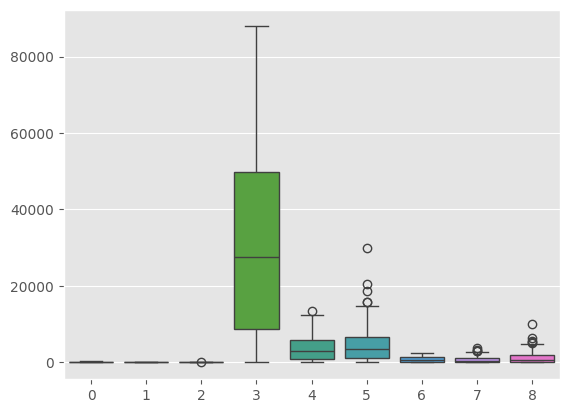

In [151]:
sns.boxplot(X_train_poly)

이전에는 스케일링 전에도 피쳐 간 범위의 차이가 심하지 않아서 스케일링의 효과가 크지 않았지만        
차수도 높아지고 피쳐 간 값 범위의 차이가 커지므로 스케일링이 필요하다
나중에 규제를 할 때도, 스케일링 안 한채로 규제하면 3번을 더 중요하다고 생각해서 덜 규제가 되어 R2 점수에 영향을 줄수도 있다

In [155]:
# 스케일링 진행
from sklearn.preprocessing import StandardScaler

# 스케일러 객체 생성하기
scaler = StandardScaler()

# 훈련 데이터: 스케일러로 학습 -> 표준화 
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

# 테스트: 학습은 하지 않고 표준화만 해준다!! 
X_test_poly_scaled = scaler.transform(X_test_poly)

<Axes: >

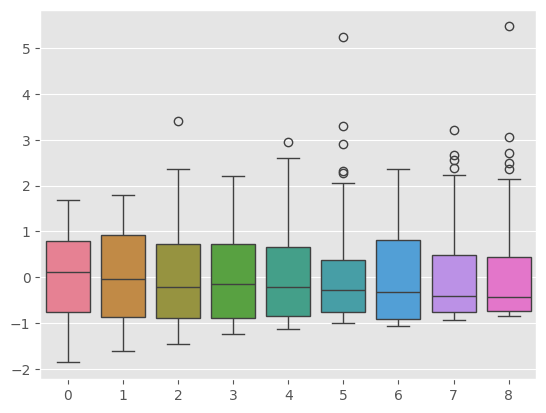

In [156]:
sns.boxplot(X_train_poly_scaled)

In [157]:
# 모델 생성 및 훈련
from sklearn.linear_model import LinearRegression
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly_scaled, y_train2)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [158]:
# 예측하고 MSE, r2 score 확인하기 
y_pred_poly = lr_poly.predict(X_test_poly_scaled)

In [159]:
print(f'MSE: {mean_squared_error(y_test2, y_pred_poly):.2f}')
print(f'r2_score: {r2_score(y_test2, y_pred_poly):.2f}')

MSE: 1.50
r2_score: 0.95


In [161]:
# 성능 비교
print('train: ', lr_poly.score(X_train_poly_scaled, y_train2))
print('test: ', lr_poly.score(X_test_poly_scaled, y_test2))

train:  0.9238235326828357
test:  0.9462913219526545


스케일링 안 한 단순 선형 회귀 결과)     
* MSE: 5.18
* r2_score: 0.81

스케일링 안 한 다중 선형 회귀 결과)                 
* MSE:2.54
* r2_score:0.91

스케일링 한 다중 선형 회귀 결과)
* MSE:2.54
* r2_score:0.91

스케일링 한 다항 선형 회귀 결과)
* MSE: 1.50
* r2_score: 0.95

=> overfitting이 아닌지에 대한 고민이 필요 train vs test도 비교해봐야 함

### 규제

다항 회귀에서는 과적합의 위험이 있음            
다항 회귀 데이터에 feature seleciton이 아닌 규제로 과적합 확인 및 방지해보기

In [132]:
# 규제
from sklearn.linear_model import Ridge

# 규제 모델 객체 생성 
lr_ridge = Ridge(alpha = 10) # 0.01, 10, 100 단위로 넣는 게 일반적 

# 규제 모델 학습
lr_ridge.fit(X_train_poly_scaled, y_train2)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",10
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [133]:
# 모델로 테스트 데이터 예측
y_pred_ridge = lr_ridge.predict(X_test_poly_scaled)

In [134]:
# 모델 성능 측정
print(f'MSE: {mean_squared_error(y_test2, y_pred_ridge):.2f}')
print(f'r2_score: {r2_score(y_test2, y_pred_ridge):.2f}')

MSE: 2.15
r2_score: 0.92


In [137]:
# 성능 비교
print('train: ', lr_ridge.score(X_train_poly_scaled, y_train2))
print('test: ', lr_ridge.score(X_test_poly_scaled, y_test2))

train:  0.8965317241728525
test:  0.9232175998550313


단순 선형 회귀 결과)     
* MSE: 5.18
* r2_score: 0.81

스케일링 + 다중 선형 회귀 결과)                 
* MSE:2.54
* r2_score:0.91
=> 한 가지 변수보다 3가지 변수를 고려했을 때 더 성능이 높아졌다

스케일링 + 다중 선형 회귀 결과)
* MSE:2.54
* r2_score:0.91
=> 선형 회귀의 경우, 데이터들 사이의 선형적 관계만을 보기 때문에 스케일링의 영향을 받지 않는다.

스케일링 + 다항 선형 회귀 결과)
* MSE: 1.50
* r2_score: 0.95
=> 다항 회귀의 경우, 높은 성능이 나왔다

스케일링 + 다항 선형 회귀 + 규제(Ridge) 결과)
* MSE: 2.15
* r2_score: 0.92
=> 규제로 인해 성능은 조금 떨어졌지만, 더 일반화된 모델